# 📊 Análisis Financiero de Empresas - Kaggle Dataset

## **Introducción**
Este proyecto tiene como objetivo analizar el desempeño financiero de diversas empresas utilizando datos de ventas, costos y ganancias. Para ello, emplearemos Python para la limpieza, transformación y análisis de los datos, y finalmente visualizaremos los resultados en **Power BI**.

### **Descripción del Dataset**
El dataset **"Company Financials Dataset"** de Kaggle contiene información detallada sobre transacciones comerciales realizadas en distintos países y segmentos de mercado. Algunas de las variables más relevantes incluyen:
- **Segmento de mercado** (e.g., Gobierno, Midmarket).
- **País** donde se realizó la venta.
- **Tipo de producto** vendido.
- **Unidades vendidas y precios de venta**.
- **Ventas brutas, descuentos y ganancias netas**.
- **Costos de producción (COGS)** y márgenes de beneficio.
- **Fechas de las transacciones**.

### **Objetivos del Proyecto**
1. **Descargar y explorar el dataset** desde la API de Kaggle.
2. **Realizar limpieza y transformación de datos** para mejorar la calidad del análisis.
3. **Realizar análisis estadístico y visualización de datos** con Python.
4. **Subir los datos procesados a SQL Server** para su integración con Power BI.
5. **Desarrollar un dashboard en Power BI** con insights clave sobre la rentabilidad de las empresas.

Este análisis permitirá identificar patrones de ventas, márgenes de ganancia y tendencias financieras en distintos mercados y regiones. 

---



## Descarga del Dataset desde Kaggle

Para obtener los datos, utilizamos la API de Kaggle en Python. Esto nos permite acceder directamente al dataset sin necesidad de descargarlo manualmente.  

In [2]:
# Descargar el dataset desde Kaggle
!kaggle datasets download -d atharvaarya25/financials --path ./data --unzip


"kaggle" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


In [3]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re

### Verificación de la Descarga

Después de descargar el dataset, verificamos que el archivo `.csv` esté presente en la carpeta **data/**.


In [4]:
# Listar los archivos en la carpeta "data"
print("Archivos en la carpeta 'data/':", os.listdir("./data"))


Archivos en la carpeta 'data/': ['Financials.csv']


In [6]:
file_path = "./data/Financials.csv"  
df = pd.read_csv(file_path)

df.head()

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,None,"$1,618.50",$3.00,$20.00,"$32,370.00",$-,"$32,370.00","$16,185.00","$16,185.00",01/01/2014,1,January,2014
1,Government,Germany,Carretera,None,"$1,321.00",$3.00,$20.00,"$26,420.00",$-,"$26,420.00","$13,210.00","$13,210.00",01/01/2014,1,January,2014
2,Midmarket,France,Carretera,None,"$2,178.00",$3.00,$15.00,"$32,670.00",$-,"$32,670.00","$21,780.00","$10,890.00",01/06/2014,6,June,2014
3,Midmarket,Germany,Carretera,None,$888.00,$3.00,$15.00,"$13,320.00",$-,"$13,320.00","$8,880.00","$4,440.00",01/06/2014,6,June,2014
4,Midmarket,Mexico,Carretera,None,"$2,470.00",$3.00,$15.00,"$37,050.00",$-,"$37,050.00","$24,700.00","$12,350.00",01/06/2014,6,June,2014


## Exploración y limpieza de los datos

In [7]:
# Verificar si existen filas duplicadas en el dataframe
duplicated_rows = df[df.duplicated()]
num_duplicated = len(duplicated_rows)

num_duplicated


0

In [8]:
# Dimensión del dataset
print(f"📌 El dataset tiene {df.shape[0]} filas y {df.shape[1]} columnas.\n")

# Información sobre tipos de datos y valores nulos
print("🔹 Información general del dataset:\n")
df.info()

# Resumen estadístico de las columnas numéricas
print("\n🔹 Resumen estadístico de los datos numéricos:\n")
df.describe()


📌 El dataset tiene 700 filas y 16 columnas.

🔹 Información general del dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Segment                700 non-null    object
 1   Country                700 non-null    object
 2    Product               700 non-null    object
 3    Discount Band         700 non-null    object
 4    Units Sold            700 non-null    object
 5    Manufacturing Price   700 non-null    object
 6    Sale Price            700 non-null    object
 7    Gross Sales           700 non-null    object
 8    Discounts             700 non-null    object
 9     Sales                700 non-null    object
 10   COGS                  700 non-null    object
 11   Profit                700 non-null    object
 12  Date                   700 non-null    object
 13  Month Number           700 non-null    int64

,Month Number,Year
count,700.000000,700.000000
mean,7.900000,2013.750000
std,3.377321,0.433322
min,1.000000,2013.000000
25%,5.750000,2013.750000
50%,9.000000,2014.000000
75%,10.250000,2014.000000
max,12.000000,2014.000000


### Limpieza de Datos

Para garantizar la calidad del análisis, realizaremos las siguientes correcciones en los datos:

1. **Eliminar espacios en los nombres de las columnas**.
2. **Convertir columnas numéricas almacenadas como `object` a `float`**, eliminando el símbolo `$` y las comas `,`.
3. **Reemplazar los valores `"-"` en la columna "Discounts" por `0`**.
4. **Convertir la columna "Date" a formato `datetime`**.


In [9]:
# Eliminar espacios en los nombres de las columnas
df.columns = df.columns.str.strip()

# Limpiar y convertir las columnas numéricas
cols_to_convert = ["Units Sold", "Manufacturing Price", "Sale Price", 
                   "Gross Sales", "Discounts", "Sales", "COGS", "Profit"]

for col in cols_to_convert:
    df[col] = df[col].astype(str)  # Convertir a string para limpieza
    df[col] = df[col].str.replace('[\$,]', '', regex=True)  # Eliminar signos de dólar y comas
    df[col] = df[col].str.strip()  # Eliminar espacios en blanco
    df[col] = df[col].replace(['-', ''], '0')  # Reemplazar guiones y valores vacíos por 0
    
    # Convertir valores con paréntesis en negativos (Ejemplo: "(1234.56)" → "-1234.56")
    df[col] = df[col].apply(lambda x: re.sub(r'\((.*?)\)', r'-\1', x))  # Quitar paréntesis y agregar signo negativo

    # Convertir finalmente a número de forma robusta
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Convertir la columna "Date" a formato datetime
df["Date"] = pd.to_datetime(df["Date"], format="%d/%m/%Y", errors='coerce')

# Verificar los cambios
df.info()
df.head()

df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Segment              700 non-null    object        
 1   Country              700 non-null    object        
 2   Product              700 non-null    object        
 3   Discount Band        700 non-null    object        
 4   Units Sold           700 non-null    float64       
 5   Manufacturing Price  700 non-null    float64       
 6   Sale Price           700 non-null    float64       
 7   Gross Sales          700 non-null    float64       
 8   Discounts            700 non-null    float64       
 9   Sales                700 non-null    float64       
 10  COGS                 700 non-null    float64       
 11  Profit               700 non-null    float64       
 12  Date                 700 non-null    datetime64[ns]
 13  Month Number         700 non-null  

,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Year
count,700.000000,700.000000,700.000000,7.000000e+02,700.000000,7.000000e+02,700.000000,700.000000,700,700.000000,700.000000
mean,1608.294286,96.477143,118.428571,1.827594e+05,13150.354671,1.696091e+05,145475.211429,24133.860414,2014-04-28 21:36:00,7.900000,2013.750000
min,200.000000,3.000000,7.000000,1.799000e+03,0.000000,1.655080e+03,918.000000,-40617.500000,2013-09-01 00:00:00,1.000000,2013.000000
25%,905.000000,5.000000,12.000000,1.739175e+04,800.320000,1.592800e+04,7490.000000,2805.960000,2013-12-24 06:00:00,5.750000,2013.750000
50%,1542.500000,10.000000,20.000000,3.798000e+04,2585.250000,3.554020e+04,22506.250000,9242.200000,2014-05-16 12:00:00,9.000000,2014.000000
75%,2229.125000,250.000000,300.000000,2.790250e+05,15956.347500,2.610775e+05,245607.500000,22662.000000,2014-09-08 12:00:00,10.250000,2014.000000
max,4492.500000,260.000000,350.000000,1.207500e+06,149677.500000,1.159200e+06,950625.000000,262200.000000,2014-12-01 00:00:00,12.000000,2014.000000
std,867.427859,108.602612,136.775515,2.542623e+05,22962.928760,2.367263e+05,203865.506118,42760.626547,NaN,3.377321,0.433322


## Análisis Exploratorio de Datos (EDA)

Con los datos ya limpios, realizamos un análisis exploratorio para comprender mejor las tendencias y patrones. Exploraremos:

- Distribución de las variables numéricas.
- Ventas por segmento de mercado y país.
- Rentabilidad y márgenes de ganancia.


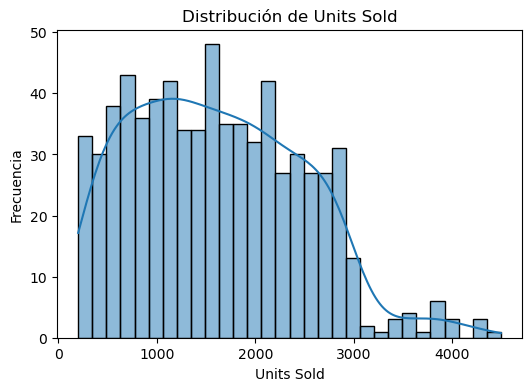

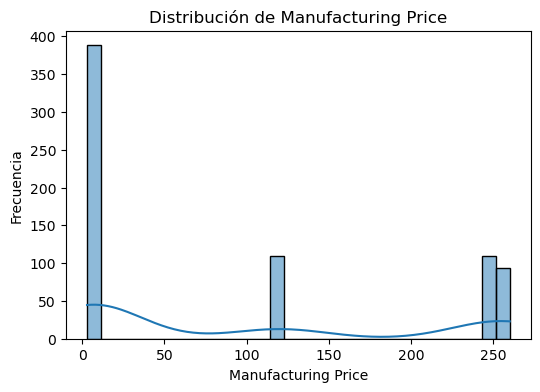

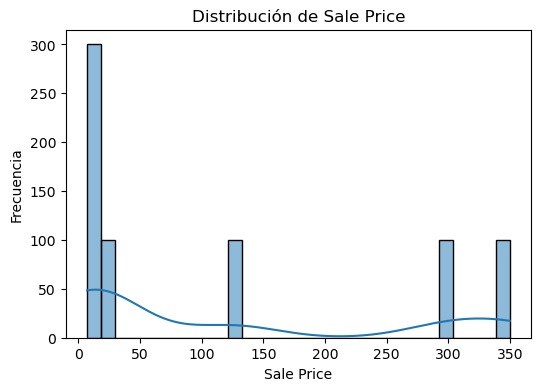

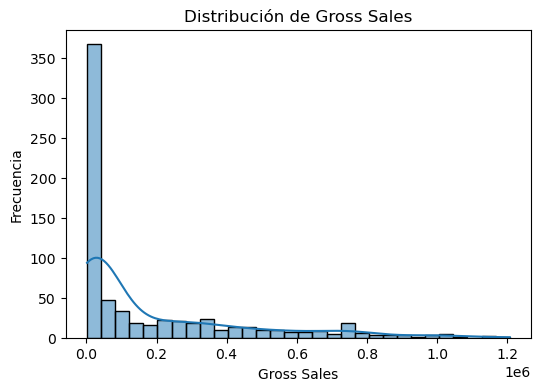

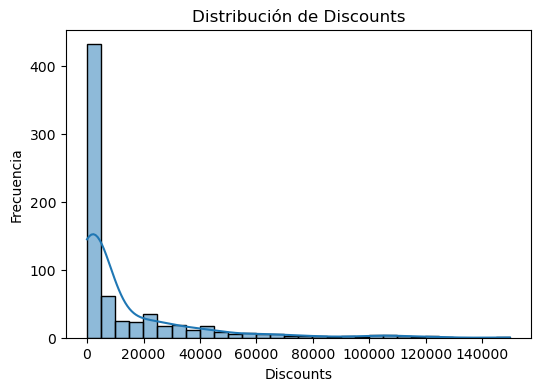

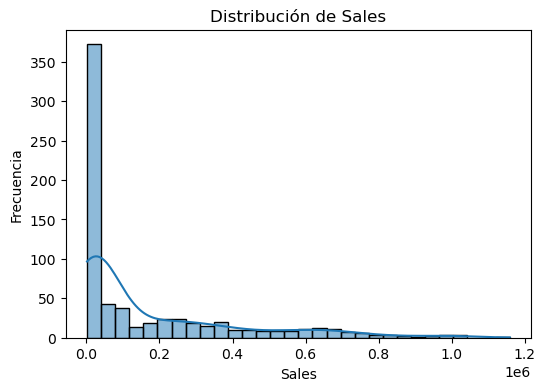

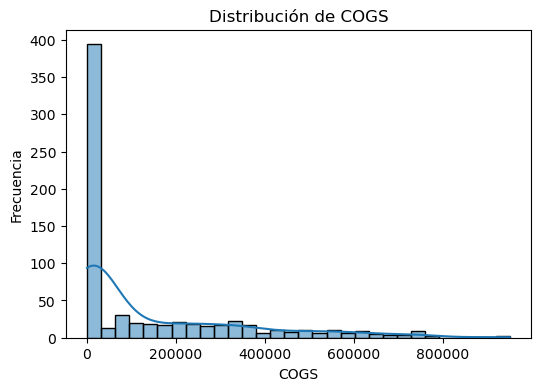

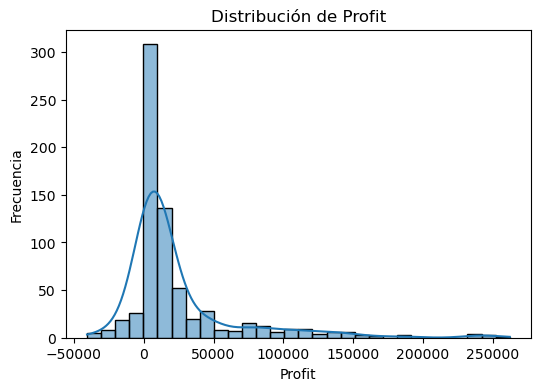

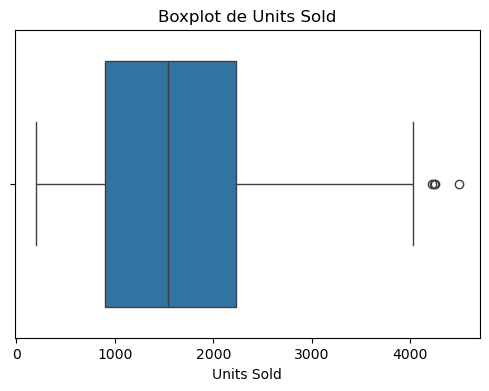

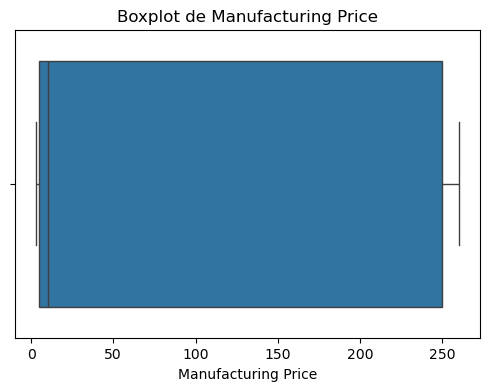

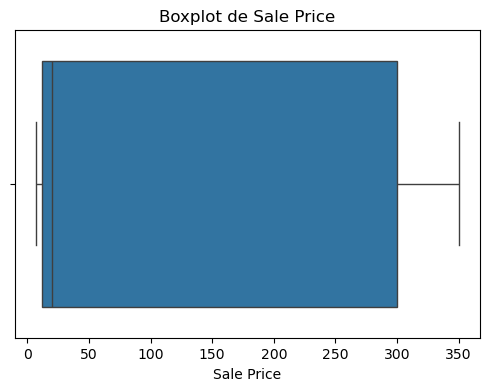

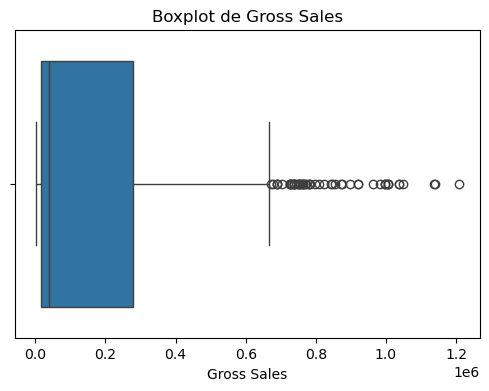

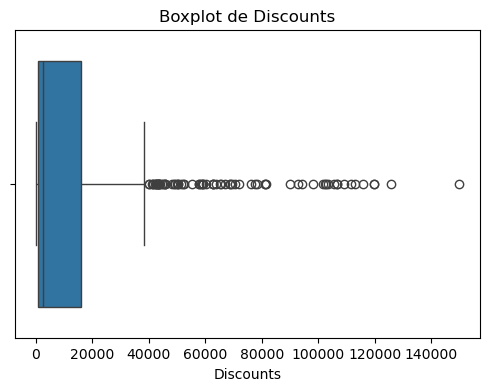

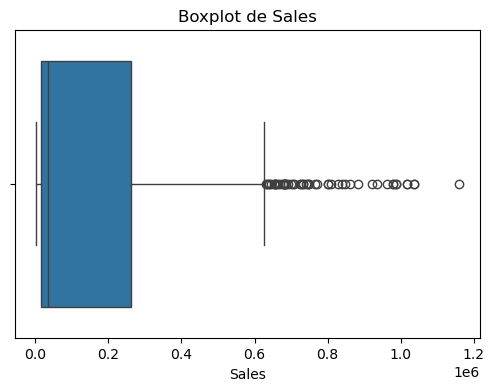

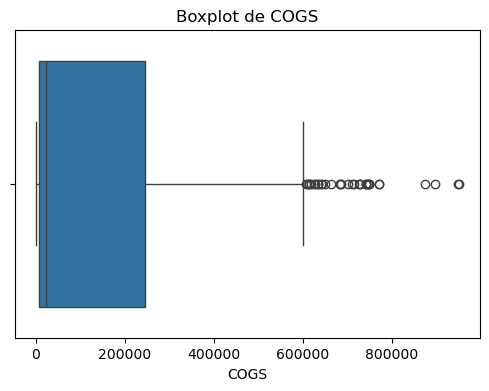

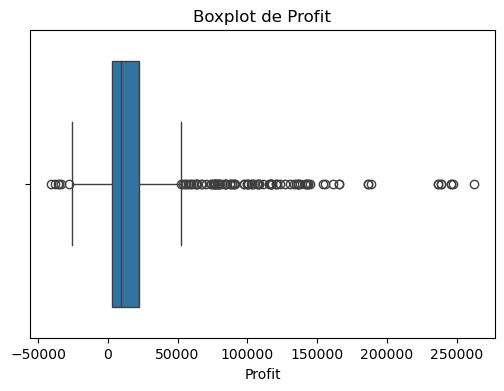

C:\Users\MIKE PC\AppData\Local\Temp\ipykernel_3324\50889942.py:24: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="Segment", y="Sales", estimator=sum, ci=None)


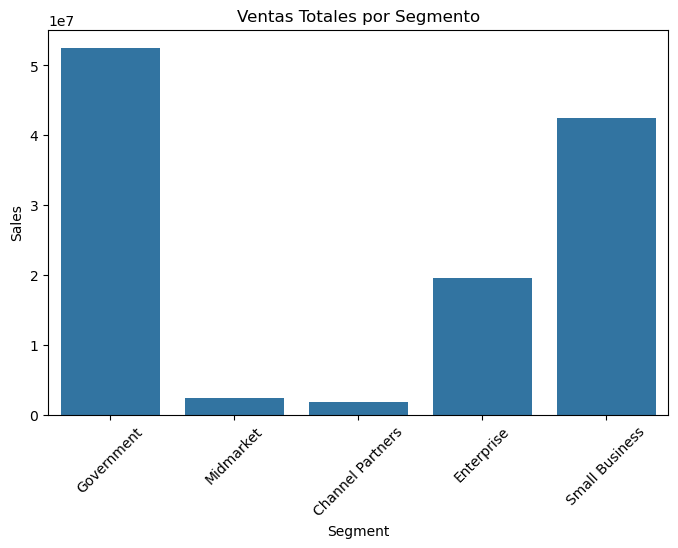

C:\Users\MIKE PC\AppData\Local\Temp\ipykernel_3324\50889942.py:31: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x="Country", y="Profit", estimator=sum, ci=None)


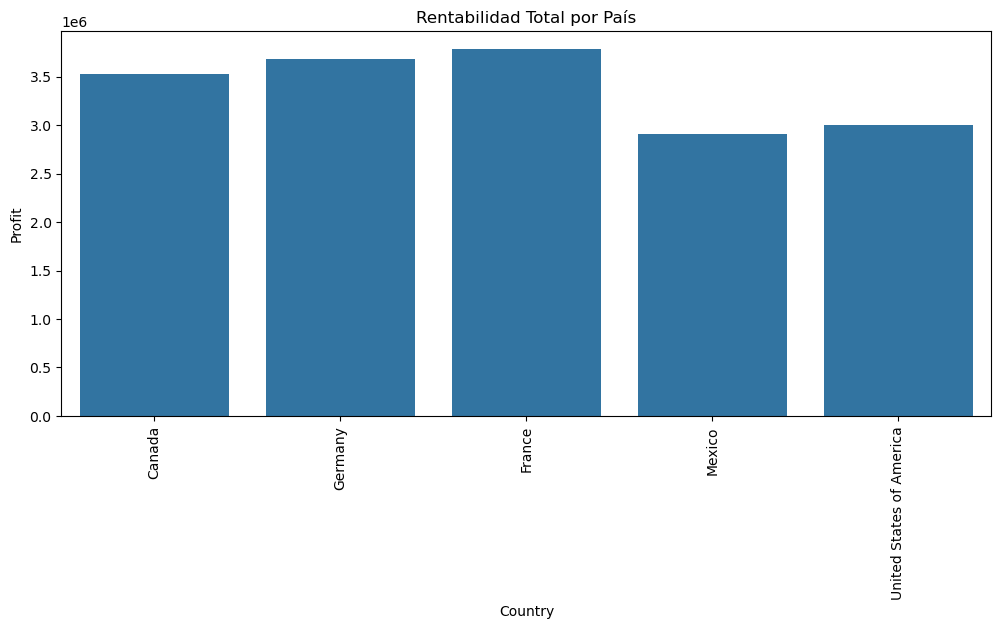

In [10]:
# Listar las columnas numéricas del dataset
numeric_cols = ["Units Sold", "Manufacturing Price", "Sale Price", 
                "Gross Sales", "Discounts", "Sales", "COGS", "Profit"]

# Visualización de histogramas individuales
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()

# Gráficos de caja para detectar valores atípicos
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot de {col}')
    plt.xlabel(col)
    plt.show()

# Ventas totales por Segmento
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x="Segment", y="Sales", estimator=sum, ci=None)
plt.title("Ventas Totales por Segmento")
plt.xticks(rotation=45)
plt.show()

# Rentabilidad por País
plt.figure(figsize=(12, 5))
sns.barplot(data=df, x="Country", y="Profit", estimator=sum, ci=None)
plt.title("Rentabilidad Total por País")
plt.xticks(rotation=90)
plt.show()

Distribución de las Ventas y Ganancias:

Las ventas y ganancias muestran una distribución muy sesgada a la derecha, lo que sugiere que la mayoría de las transacciones son de bajo valor, con algunas ventas excepcionales muy altas.
El sesgo positivo puede indicar la presencia de valores atípicos (outliers).


Precios de Manufactura y Venta:

Tanto el precio de manufactura como el de venta tienen distribuciones discretas, indicando que posiblemente se trabajó con un número limitado de productos con precios fijos.
Esto se ve reflejado en los picos específicos de los histogramas.


Descuentos y Costos (COGS):

La mayoría de los descuentos son cercanos a 0, pero hay algunos casos con descuentos muy altos.
Los costos de bienes vendidos (COGS) también presentan un sesgo positivo, similar a las ventas y ganancias.


Análisis de Boxplots:

Los gráficos de caja revelan la presencia de valores atípicos en las columnas de Units Sold, Sales, COGS y Profit.
Los outliers pueden influir fuertemente en los análisis estadísticos, por lo que podríamos considerar tratarlos (eliminarlos o transformarlos).

### Aplicaremos una transformación logarítmica

Esto con el fin de poder visualizar de mejor manera las distribuciones y los valores atípicos que se puedan presentar

In [11]:
# Aplicar la transformación logarítmica a las columnas numéricas con sesgo positivo
cols_to_transform = ["Units Sold", "Gross Sales", "Discounts", "Sales", "COGS", "Profit"]

for col in cols_to_transform:
    if col in df.columns:
        df[f'log_{col}'] = np.log1p(df[col])
    else:
        print(f"La columna '{col}' no se encontró en el dataframe.")

# Mostrar el resumen estadístico de las columnas transformadas
df[[f'log_{col}' for col in cols_to_transform if f'log_{col}' in df.columns]].describe()


d:\anaconda\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


,log_Units Sold,log_Gross Sales,log_Discounts,log_Sales,log_COGS,log_Profit
count,700.000000,700.000000,700.000000,700.000000,700.000000,642.000000
mean,7.199945,10.988265,7.632587,10.910878,10.510921,9.243943
std,0.662250,1.620573,2.760218,1.623155,1.866934,1.607943
min,5.303305,7.495542,0.000000,7.412209,6.823286,0.000000
25%,6.809039,9.763807,6.686259,9.675897,8.921458,8.198729
50%,7.341807,10.544841,7.857955,10.478447,10.021591,9.295692
75%,7.709812,12.538997,9.677664,12.472571,12.411492,10.129109
max,8.410387,14.004063,11.916245,13.963242,13.764876,12.476867


In [12]:
# Aplicar la transformación logarítmica para ganancias y pérdidas
df['log_Profit'] = df['Profit'].apply(lambda x: np.log1p(x) if x >= 0 else -np.log1p(abs(x)))

# Verificar el resumen estadístico después de la corrección
df[['Profit', 'log_Profit']].describe()


,Profit,log_Profit
count,700.000000,700.000000
mean,24133.860414,7.722698
std,42760.626547,5.301620
min,-40617.500000,-10.611979
25%,2805.960000,7.939857
50%,9242.200000,9.131643
75%,22662.000000,10.028489
max,262200.000000,12.476867


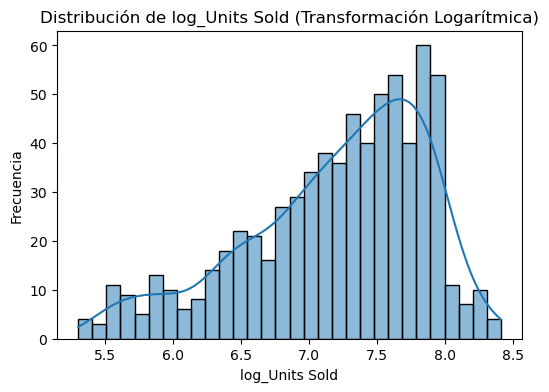

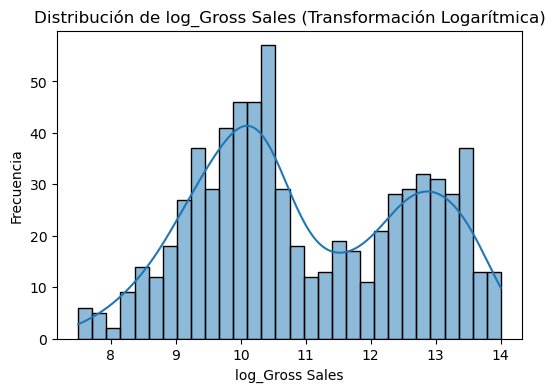

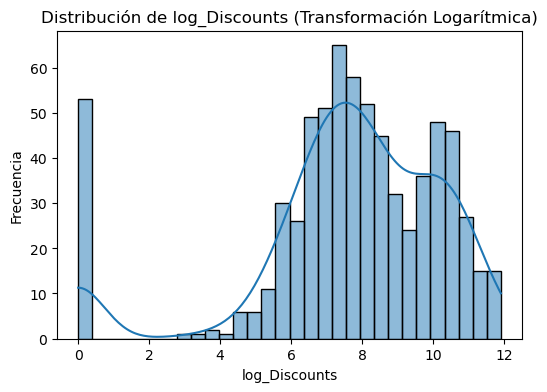

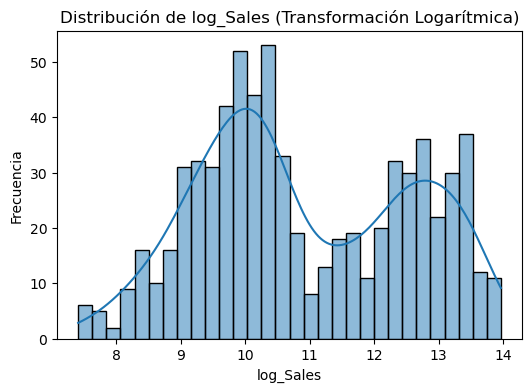

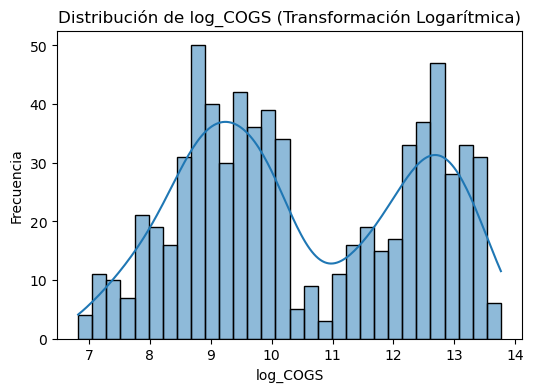

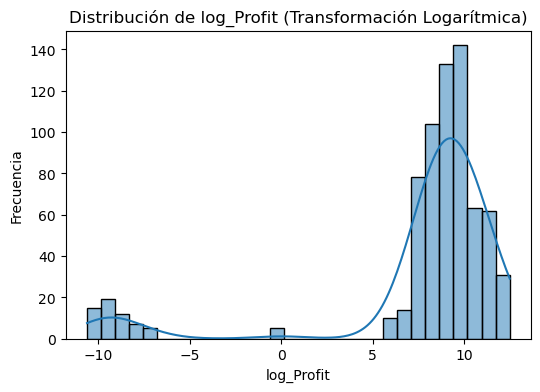

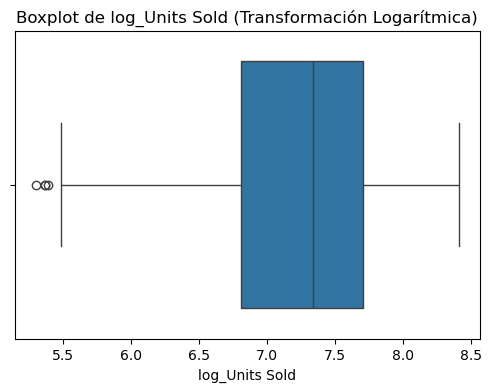

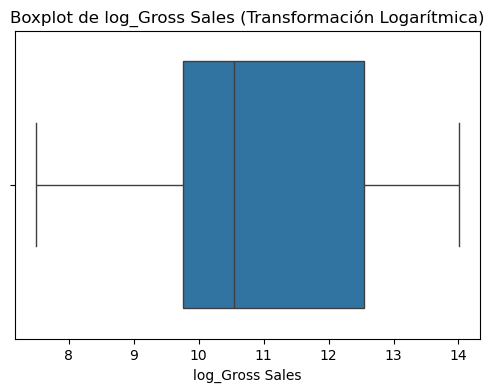

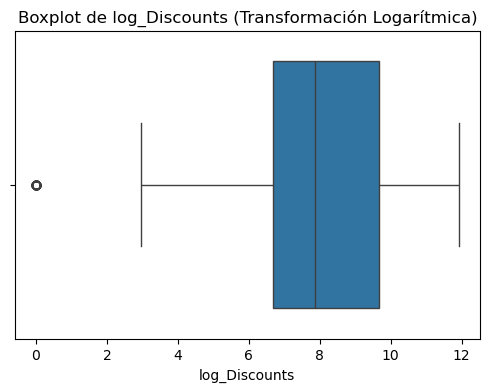

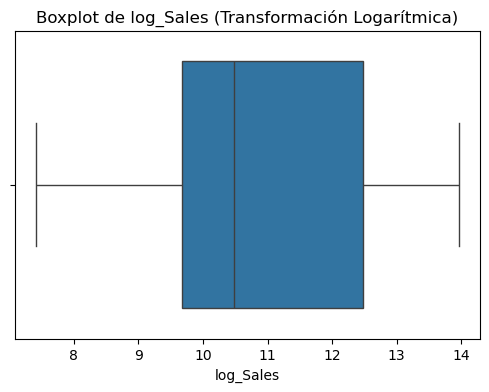

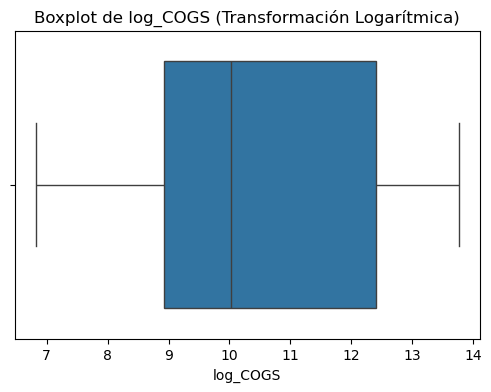

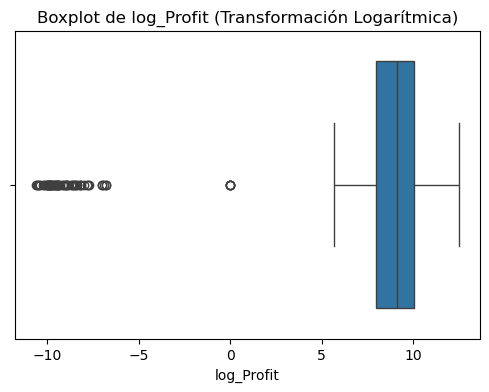

In [13]:
# Columnas transformadas logarítmicamente
log_columns = [f'log_{col}' for col in ["Units Sold", "Gross Sales", "Discounts", "Sales", "COGS", "Profit"]]

# Visualización de histogramas individuales para las columnas transformadas
for col in log_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribución de {col} (Transformación Logarítmica)')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()

# Gráficos de caja (boxplots) para detectar valores atípicos en las columnas transformadas
for col in log_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot de {col} (Transformación Logarítmica)')
    plt.xlabel(col)
    plt.show()


### Conclusiones Transformación logarítmica

1. **log_Units Sold:** La distribución es bastante normal, con solo un par de valores atípicos mínimos.
2. **log_Gross Sales, log_Sales, log_COGS:** Muestran una distribución bimodal, lo cual podría indicar diferentes segmentos o categorías de productos con comportamientos distintos.
3. **log_Discounts:** Presenta un pico en **0**, lo cual tiene sentido, ya que muchas transacciones no tienen descuentos aplicados.
4. **log_Profit:** Se distingue claramente entre ganancias (valores positivos) y pérdidas (valores negativas), lo cual refleja adecuadamente la realidad.

---

## Conclusión sobre la Calidad de los Datos:
Podemos decir con confianza que los datos son de alta calidad, están bien estructurados y son aptos para el análisis o para ser utilizados en un dashboard.

In [14]:
# Exportar el dataset limpio a un archivo CSV
df.to_csv('Financials_clean.csv', index=False)


In [15]:
current_path = os.getcwd()
print("El archivo se guardó en la carpeta:", current_path)

El archivo se guardó en la carpeta: c:\Users\MIKE PC\.vscode\Aprending\financial_analysis_project
